In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime as dt

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [4]:
print("Beginning Data Retrieval")
print("-----------------------------")
cities_df = []
record_count=1
set_count=1
for x in cities:
    response = requests.get("http://api.openweathermap.org/data/2.5/weather?", params=dict(q=x, units="imperial", APPID=api_key))
    if response.status_code != 200:
        print("City not found. Skipping...")
    else:
        response = requests.get("http://api.openweathermap.org/data/2.5/weather?", params=dict(q=x, units="imperial", APPID=api_key)).json()
        print(f"Processing Record {record_count} of Set {set_count} | {x}")
        cities_df.append(response)
        record_count += 1
        if record_count == 51:
            record_count = 1
            set_count += 1
            
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | dunda
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | lapeer
Processing Record 5 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | havre de grace
Processing Record 9 of Set 1 | san cristobal
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | salalah
City not found. Skipping...
Processing Record 12 of Set 1 | hualmay
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | havre-saint-pierre
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | paamiut
City not found. Skipping...
Processing Record 18 of Set 1 | mangrol
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | fortuna
City not found. Skipping...
City not

Processing Record 31 of Set 4 | ketchikan
Processing Record 32 of Set 4 | port moresby
Processing Record 33 of Set 4 | aklavik
Processing Record 34 of Set 4 | coahuayana
Processing Record 35 of Set 4 | minsk mazowiecki
Processing Record 36 of Set 4 | lompoc
Processing Record 37 of Set 4 | tamandare
Processing Record 38 of Set 4 | ploemeur
Processing Record 39 of Set 4 | samarai
Processing Record 40 of Set 4 | viedma
City not found. Skipping...
Processing Record 41 of Set 4 | mariakani
Processing Record 42 of Set 4 | college
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | brae
Processing Record 45 of Set 4 | ishigaki
City not found. Skipping...
Processing Record 46 of Set 4 | canakkale
City not found. Skipping...
City not found. Skipping...
Processing Record 47 of Set 4 | padang
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | golfito
Processing Record 50 of Set 4 | suleja
Processing Record 1 of Set 5 | oum hadjer
Processing Record 2

Processing Record 20 of Set 8 | erzin
Processing Record 21 of Set 8 | ostrovnoy
Processing Record 22 of Set 8 | kaliua
Processing Record 23 of Set 8 | moroni
Processing Record 24 of Set 8 | klaksvik
Processing Record 25 of Set 8 | rongcheng
Processing Record 26 of Set 8 | atar
Processing Record 27 of Set 8 | alyangula
Processing Record 28 of Set 8 | columbus
Processing Record 29 of Set 8 | avera
Processing Record 30 of Set 8 | walvis bay
Processing Record 31 of Set 8 | henties bay
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | natitingou
Processing Record 34 of Set 8 | quatre cocos
Processing Record 35 of Set 8 | christchurch
Processing Record 36 of Set 8 | tiquisio
Processing Record 37 of Set 8 | otane
City not found. Skipping...
Processing Record 38 of Set 8 | khilok
Processing Record 39 of Set 8 | toora-khem
Processing Record 40 of Set 8 | teya
Processing Record 41 of Set 8 | siyabuswa
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8

Processing Record 2 of Set 12 | ca mau
Processing Record 3 of Set 12 | arroyo
Processing Record 4 of Set 12 | belmonte
City not found. Skipping...
Processing Record 5 of Set 12 | pak phanang
Processing Record 6 of Set 12 | namatanai
Processing Record 7 of Set 12 | mattru
Processing Record 8 of Set 12 | kipushi
Processing Record 9 of Set 12 | roma
-----------------------------
Data Retrieval Complete
-----------------------------


In [19]:
## create dataframe from all responses
DF = pd.DataFrame(cities_df)
DF.to_csv(output_data_file, sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

In [6]:
## reordering dataframe with city name as first column
cols = list(DF)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('name')))
# use ix to reorder
testDF = DF.loc[:, cols]

In [7]:
testDF.head()

,name,base,clouds,cod,coord,dt,id,main,rain,sys,visibility,weather,wind
0,Dunda,stations,{'all': 80},200,"{'lon': 78.32, 'lat': 30.62}",1546711948,1253628,"{'temp': 31.29, 'pressure': 786.29, 'humidity'...",NaN,"{'message': 0.0542, 'country': 'IN', 'sunrise'...",NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 1.7, 'deg': 55}"
1,Punta Arenas,stations,{'all': 0},200,"{'lon': -70.91, 'lat': -53.16}",1546711200,3874787,"{'temp': 52.41, 'pressure': 990, 'humidity': 4...",NaN,"{'type': 1, 'id': 8487, 'message': 0.0578, 'co...",10000.0,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 32.21, 'deg': 290, 'gust': 20.6}"
2,Hermanus,stations,{'all': 0},200,"{'lon': 19.24, 'lat': -34.42}",1546711949,3366880,"{'temp': 68.28, 'pressure': 991.45, 'humidity'...",NaN,"{'message': 0.0036, 'country': 'ZA', 'sunrise'...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 4.83, 'deg': 142.5}"
3,Lapeer,stations,{'all': 1},200,"{'lon': -83.32, 'lat': 43.05}",1546710960,4998842,"{'temp': 42.22, 'pressure': 1006, 'humidity': ...",NaN,"{'type': 1, 'id': 3780, 'message': 0.0059, 'co...",11265.0,"[{'id': 741, 'main': 'Fog', 'description': 'fo...","{'speed': 8.05, 'deg': 240}"
4,Kaitangata,stations,{'all': 88},200,"{'lon': 169.85, 'lat': -46.28}",1546711950,2208248,"{'temp': 53.84, 'pressure': 1003.61, 'humidity...",{'3h': 0.475},"{'message': 0.0034, 'country': 'NZ', 'sunrise'...",NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 9.19, 'deg': 272}"


In [8]:
## function that extracts elements needed for output dataframe
def df_builder(x):
    list_appender = []
    list_appender.append(testDF['name'][x])
    list_appender.append(testDF['clouds'][x]['all'])
    list_appender.append(testDF['sys'][x]['country'])
    list_appender.append(testDF['dt'][x])
    list_appender.append(testDF['main'][x]["humidity"])
    list_appender.append(testDF['coord'][x]["lat"])
    list_appender.append(testDF['coord'][x]["lon"])
    list_appender.append(testDF['main'][x]["temp_max"])
    list_appender.append(testDF['wind'][x]["speed"])
    return list_appender
## set output data frame with desired columns    
outputDF=pd.DataFrame(columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
## use function to create dataframe with desired values and format
for x in range(len(testDF)):
    outputDF.loc[x] = df_builder(x)

In [9]:
##output sample
outputDF.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [10]:
outputDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dunda,80,IN,1546711948,100,30.62,78.32,31.29,1.70
1,Punta Arenas,0,CL,1546711200,46,-53.16,-70.91,53.60,32.21
2,Hermanus,0,ZA,1546711949,63,-34.42,19.24,68.28,4.83
3,Lapeer,1,US,1546710960,83,43.05,-83.32,45.50,8.05
4,Kaitangata,88,NZ,1546711950,91,-46.28,169.85,53.84,9.19


## Latitude vs. Temperature Plot

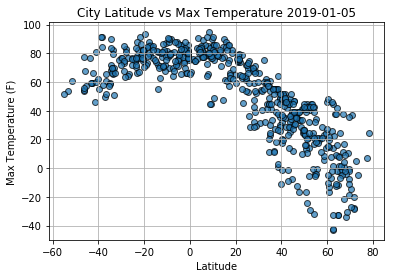

In [15]:
#get current date for title
x=dt.datetime.today()
y=x.date()
plt.scatter(outputDF['Lat'],outputDF["Max Temp"],alpha=.7,edgecolor='black')
plt.grid()
#plt.ylim(25,100)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
## change later to give current date
plt.title(f"City Latitude vs Max Temperature {y}")
plt.savefig('lat_temp.png')

## Latitude vs. Humidity 

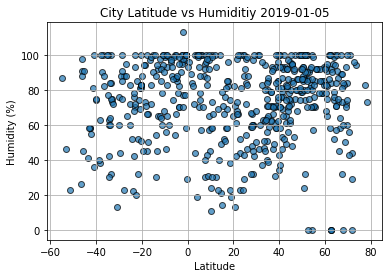

In [16]:
plt.scatter(outputDF['Lat'],outputDF["Humidity"],alpha=.7,edgecolor='black')
plt.grid()
#plt.ylim(25,100)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
## change later to give current date
plt.title(f"City Latitude vs Humiditiy {y}")
plt.savefig('lat_humidity.png')

##  Latitude vs. Cloudiness Plot

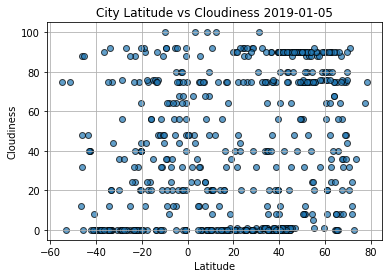

In [17]:
plt.scatter(outputDF['Lat'],outputDF["Cloudiness"],alpha=.7,edgecolor='black')
plt.grid()
#plt.ylim(25,100)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
## change later to give current date
plt.title(f"City Latitude vs Cloudiness {y}")
plt.savefig('lat_cloud.png')

##  Latitude vs. Wind Speed Plot

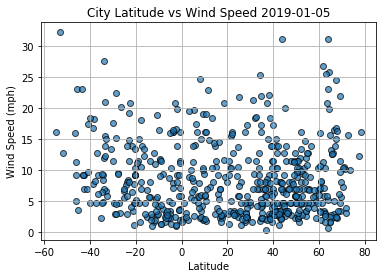

In [18]:
plt.scatter(outputDF['Lat'],outputDF["Wind Speed"],alpha=.7,edgecolor='black')
plt.grid()
#plt.ylim(25,100)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
## change later to give current date
plt.title(f"City Latitude vs Wind Speed {y}")
plt.savefig('lat_wind.png')

## Trends Analysis

The temperature does seem to get higher as the cities get closer to the equator (0 latitude), However due to the tilt of the Earth, the northern hemisphere has lower on average temperatures. On average for this time of year, wind speed seems to be below 10 mph. Humidity for this time of year tends on average well above 60%, with many (maybe over 50%) of cities being over 80% humidity(Would need to analysis through other means besides looking strictly at a graph to confirm this).